# Powerpoint Reporting with Python

In [ ]:
from pptx import Presentation
from pptx.util import Inches
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import datetime

from sqlalchemy import create_engine

TypeError: to_numeric() got an unexpected keyword argument 'x'

# 1 - Run SQL Query on Database

In [2]:
engine = create_engine('sqlite:///../datasets/grocery_sales.sqlite')
query = """select * from grocery_sales"""
sales = pd.read_sql_query(query, engine)

# 2 - Clean data: missing values, ...

In [4]:
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales['sales'] = pd.to_numeric(sales['sales'])
sales_average = sales['sales'].mean()
sales['sales'].fillna(value = sales_average);

# 3 - Generate Business Insights with Python

## 3.1 - Find best customers

In [8]:
best_clients = sales.groupby('customer_id').sum()['sales'].sort_values(ascending=False)[:5]

## 3.2 - Plot daily sales for month

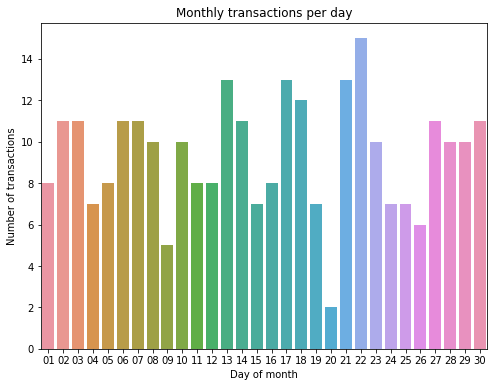

In [9]:
plt.figure(figsize = (8,6))

myFmt = mdates.DateFormatter('%d')

ax = sns.countplot(x=sales['transaction_date']);
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Day of month')
ax.set_ylabel('Number of transactions')
ax.set_title('Monthly transactions per day')
plt.savefig('./monthly_sales.png')

# 4 - Create Powerpoint report

# 4.1 - Cover slide

In [10]:
prs = Presentation()

title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Monthly reporting"
subtitle.text = "Transactions per day"

# 4.2 - Sales Graph

In [11]:
blank_slide_layout = prs.slide_layouts[0]

# ajout des slides
slide = prs.slides.add_slide(blank_slide_layout)
left = top = Inches(1)
img_path = './monthly_sales.png'
pic = slide.shapes.add_picture(img_path, left, top)

# 4.3 - Best clients this month

In [12]:
title_only_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_only_slide_layout)
shapes = slide.shapes

shapes.title.text = 'Best clients this month'

cols = 2
rows = len(best_clients)+1
left = top = Inches(2.0)
width = Inches(6.0)
height = Inches(0.8)

table = shapes.add_table(rows, cols, left, top, width, height).table

# set column widths
table.columns[0].width = Inches(2.0)
table.columns[1].width = Inches(4.0)

# write column headings
table.cell(0, 0).text = 'Customer ID'
table.cell(0, 1).text = 'Total Sales'

i = 1
for client in best_clients.items():
    table.cell(i, 0).text = str(int(client[0]))
    table.cell(i, 1).text = str(int(client[1]))
    i+=1

# 5 - Save to PPT!

In [13]:
prs.save('Reporting.pptx') 

In [32]:
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])